In [10]:
import pydicom
file_path = "D://copyRaw//Phantom_aguix_series_1//2024_06_03.9002.100.2024_06_03.KOLOR_LUNG_Ph_03_06_202400000//Conventional//dcm"
medical_image = pydicom.read_file(file_path)
print(medical_image)

PermissionError: [Errno 13] Permission denied: 'D://copyRaw//Phantom_aguix_series_1//2024_06_03.9002.100.2024_06_03.KOLOR_LUNG_Ph_03_06_202400000//Conventional//dcm'

In [ ]:
from pyKOLOR import Sample, Viewer, VesselAnalyzer
base_path = "D:/copyRaw/Phantom_aguix_series_"
sample1 = Sample(base_path, "3")
base_path = "D:/copyRaw/Phantom_dotarem_series_"
sample2 = Sample(base_path, "3")
#sample3 = Sample(base_path, "3")

Available directories:
0: 2024_06_03.9002.300.2024_06_26.KOLOR_LUNG_Ph_03_06_2024_d00001
Conventional file 1 total DICOM files found: 29
Spectral/k_gadolinium file 1 total DICOM files found: 29
Spectral/b_iodine file 1 total DICOM files found: 29
Available directories:
0: 2024_06_03.9004.300.2024_06_26.KOLOR_LUNG_Ph_03_06_2024_d00003
Conventional file 1 total DICOM files found: 29
Spectral/k_gadolinium file 1 total DICOM files found: 29
Spectral/b_iodine file 1 total DICOM files found: 29


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\pyKOLOR.py:160: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.time_slider = Slider(plt.axes([0.2, 0.15, 0.65, 0.03], facecolor='lightgray'), 't', 0, len(self.sample.acquisition)-1, valinit=self.init_time_point, valstep=1)


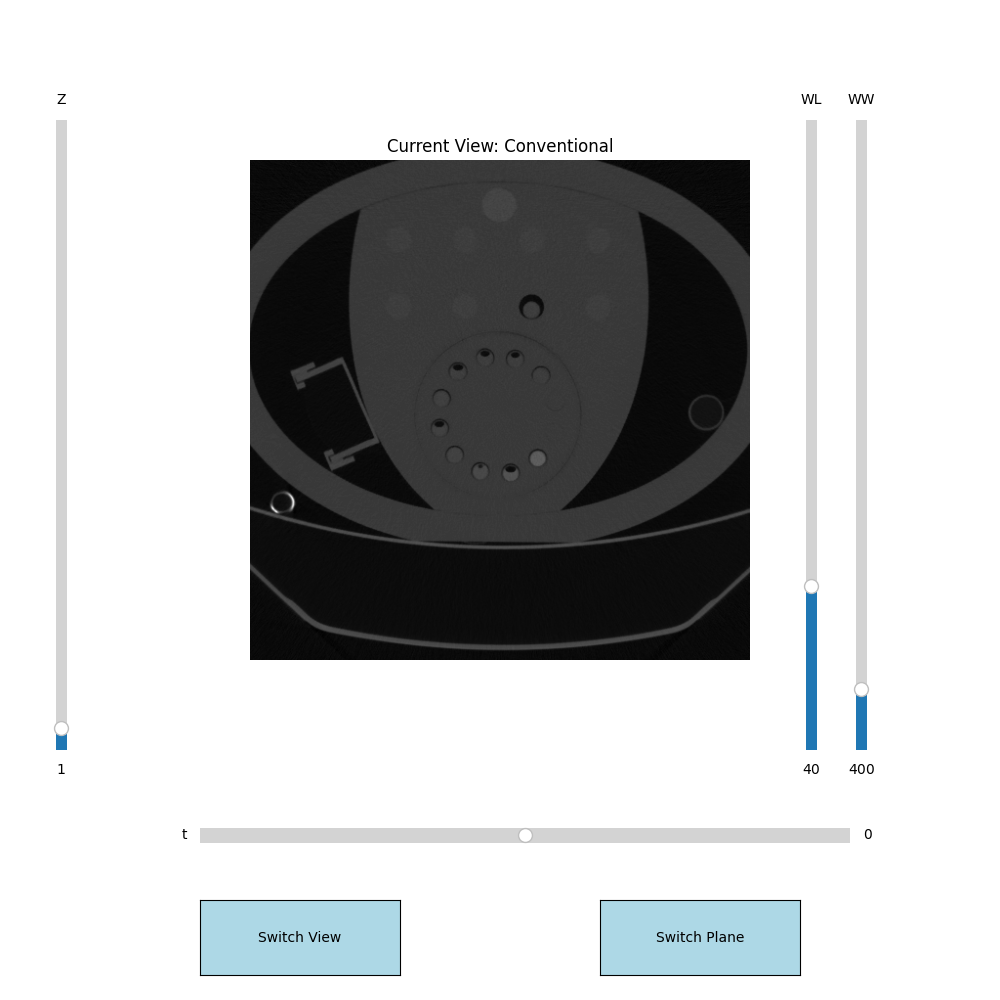

In [31]:
%matplotlib widget
from pyKOLOR import VesselAnalyzer
VesselAnalyzer(sample2)

In [258]:
from pyKOLOR import Sample, Viewer, VesselAnalyzer
#base_path = "D:/copyRaw/Nebulisation_AGuI"
base_path = "D:/copyRaw/Nebulisation_AGuIX_helic"
sample1 = Sample(base_path, "e")

Available directories:
0: 19_2024_06_11.9242.200.2024_06_11.KOLOR_LUNG_RAB1687_7_Kedge_a00023
Conventional file 1 total DICOM files found: 312
Spectral/k_gadolinium file 1 total DICOM files found: 312
Spectral/b_iodine file 1 total DICOM files found: 312


Max: -444.7055244445801, Min:-1081.0


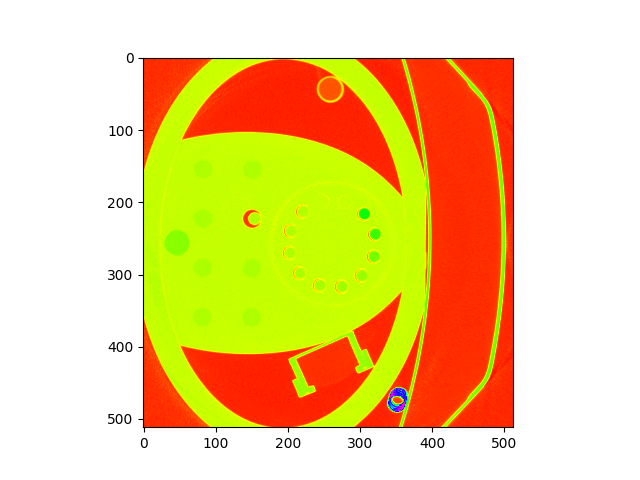

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
sample = sample1.acquisition[0].conventional[:, :, :]
plt.clf()

max_projection = np.max(sample, axis=2)
print(f"Max: {np.mean(max_projection)}, Min:{np.min(max_projection)}")

plt.imshow(np.rot90(max_projection), cmap = "hsv")
plt.show()

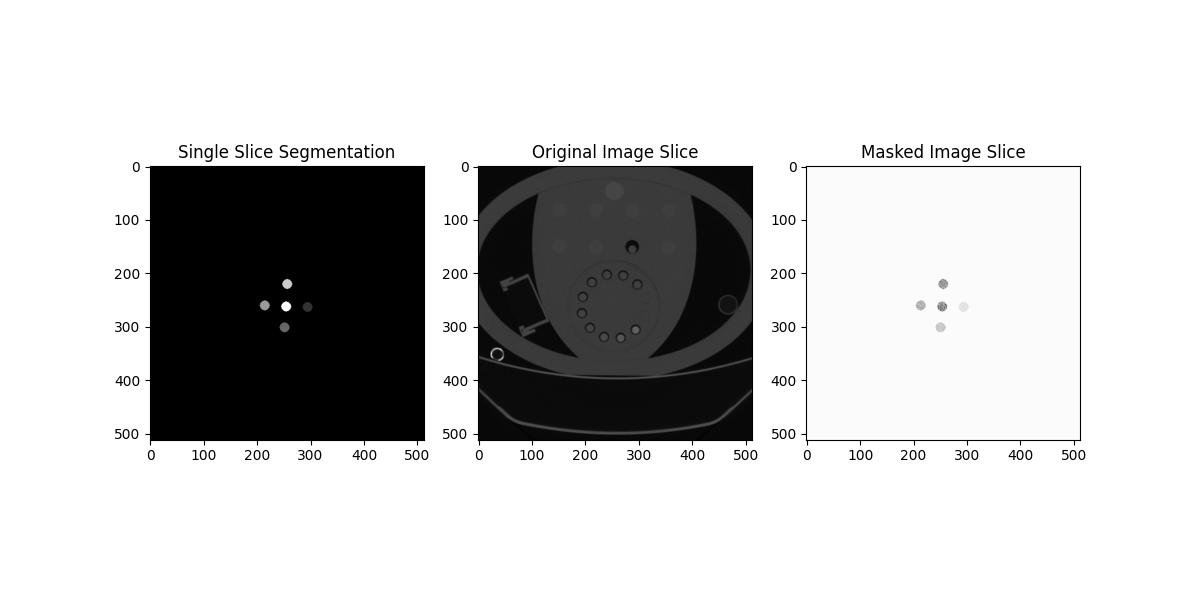

In [49]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt
samp = sample1
# Load the data
readdata, header = nrrd.read("D:/3d_masks/aguix_phantom.seg.nrrd")
readdata = np.swapaxes(readdata, 0 , 1)

# The slice from which to take the segmentation
slice_index = 14  # Middle slice, adjust as needed
single_slice_segmentation = readdata[:, :, slice_index]

# Get the dimensions of the target dataset
target_slices = samp.acquisition[0].conventional.shape[2]  # Number of slices in your 3D image

# Ensure the replication is correctly oriented and aligned
full_segmentation = np.repeat(single_slice_segmentation[:, :, np.newaxis], target_slices, axis=2)

# Masking the 3D dataset
masked_data = full_segmentation * samp.acquisition[0].conventional

# Choose a slice to visualize
n = 12

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(single_slice_segmentation, cmap='gray')
plt.title("Single Slice Segmentation")

plt.subplot(1, 3, 2)
plt.imshow(samp.acquisition[0].conventional[:, :, n], cmap='gray')
plt.title("Original Image Slice")

plt.subplot(1, 3, 3)
plt.imshow(masked_data[:, :, n], cmap='gray')
plt.title("Masked Image Slice")

plt.show()


In [67]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
samp = sample1
readdata, header = nrrd.read("D:/3d_masks/aguix_phantom.seg.nrrd")
readdata = np.swapaxes(readdata, 0, 1)

# Define segment labels with their corresponding values (update as necessary)
segment_labels = {
    "right": 1,  # Example: Update these values based on your actual segmentation labels
    "down": 2,
    "left": 3,
    "top": 4,
    "center": 5
}

# The slice from which to take the segmentation
slice_index = 25  # Middle slice, adjust as needed
single_slice_segmentation = readdata[:, :, 14]

# Get the dimensions of the target dataset
target_slices = samp.acquisition[0].conventional.shape[2]  # Number of slices in your 3D image

# Function to calculate mean and standard deviation of CT numbers within a mask
def calculate_ct_numbers(data, mask):
    masked_data = data[mask]
    mean_ct = np.mean(masked_data)
    std_ct = np.std(masked_data)
    return mean_ct


# Calculate mean CT numbers for each segment on a specific slice
ct_values = {}
for name, label in segment_labels.items():
    mask = single_slice_segmentation == label
    mean_ct = calculate_ct_numbers(samp.acquisition[0].conventional[:, :, slice_index], mask)
    ct_values[name] = mean_ct

# Calculate uniformity index
center_ct = ct_values['center']
peripheral_cts = [ct_values[name] for name in ct_values if name != 'center']
uniformity_indices = [abs(center_ct - ct) / len(peripheral_cts) for ct in peripheral_cts]

print("CT Values for each ROI:", ct_values)
print("Uniformity Indices:", uniformity_indices)



CT Values for each ROI: {'right': -78.69731800766283, 'down': -79.77394636015326, 'left': -76.88122605363985, 'top': -73.89272030651341, 'center': -76.33333333333333}
Uniformity Indices: [0.5909961685823752, 0.860153256704983, 0.13697318007663029, 0.6101532567049794]


Mean CT value for top: -77.31
Mean CT value for down: -77.65
Mean CT value for left: -76.54
Mean CT value for right: -76.11
Mean CT value for center: -74.36
Mean uniformity index for top: 0.86
Mean uniformity index for down: 0.98
Mean uniformity index for left: 0.81
Mean uniformity index for right: 0.95


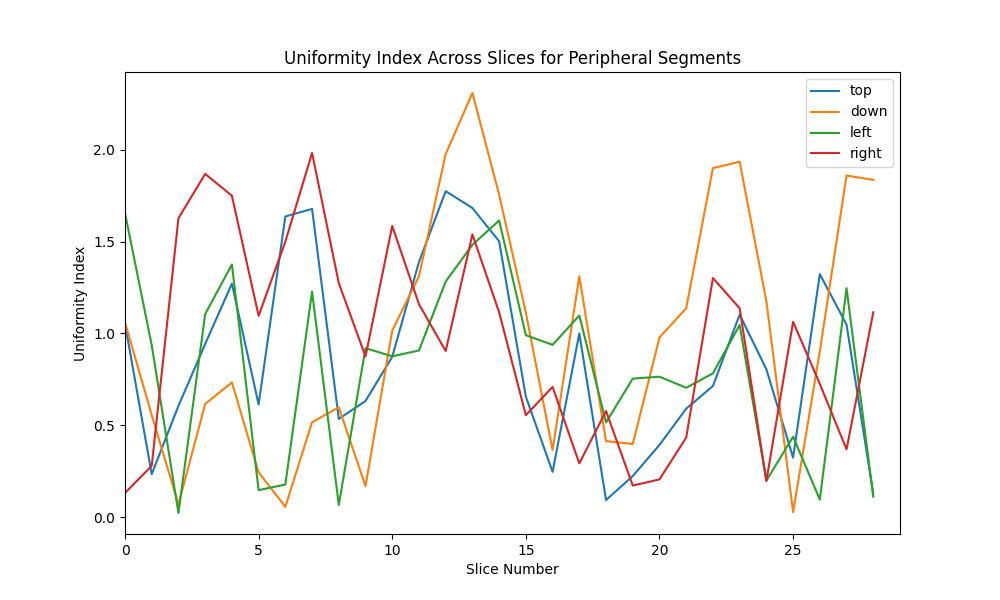

In [37]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
samp = sample1
readdata, header = nrrd.read("D:/3d_masks/aguix_phantom.seg.nrrd")
readdata = np.swapaxes(readdata, 0, 1)

# Define segment labels with their corresponding values
segment_labels = {
    "top": 1,
    "down": 2,
    "left": 3,
    "right": 4,
    "center": 5
}

# Function to calculate the mean of CT numbers within a mask
def calculate_mean_ct(data, mask):
    masked_data = data[mask]
    mean_ct = np.mean(masked_data)
    return mean_ct

# Initialize dictionary to store uniformity indices for each peripheral segment
uniformity_data = {name: [] for name in segment_labels if name != 'center'}
ct_accumulated = {name: [] for name in segment_labels.keys()}

# Range of slices to analyze
slice_range = range(0, 29)  # slices from 6 to 24

# Compute uniformity indices for each slice in the range
for slice_index in slice_range:
    single_slice_segmentation = readdata[:, :, 14]
    ct_values = {}

    # Calculate CT numbers for each segment on this slice
    for name, label in segment_labels.items():
        mask = single_slice_segmentation == label
        mean_ct = calculate_mean_ct(samp.acquisition[0].conventional[:, :, slice_index], mask)
        ct_values[name] = mean_ct
        ct_accumulated[name].append(mean_ct) 

    # Calculate uniformity index for the slice
    center_ct = ct_values['center']
    for name in uniformity_data.keys():
        uniformity_index = abs(center_ct - ct_values[name])/4
        uniformity_data[name].append(uniformity_index)
    
for name, values in ct_accumulated.items():
    mean_ct_value = np.mean(values)
    print(f"Mean CT value for {name}: {mean_ct_value:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
for name, values in uniformity_data.items():
    mean_uniformity = np.mean(values)
    uniformity_data[name] = mean_uniformity
    print(f"Mean uniformity index for {name}: {mean_uniformity:.2f}")
    plt.plot(slice_range, values, label=name)

plt.xlabel('Slice Number')
plt.ylabel('Uniformity Index')
plt.title('Uniformity Index Across Slices for Peripheral Segments')
plt.legend()
plt.xlim(0, 29)
plt.show()


AttributeError: 'dict' object has no attribute 'shape'

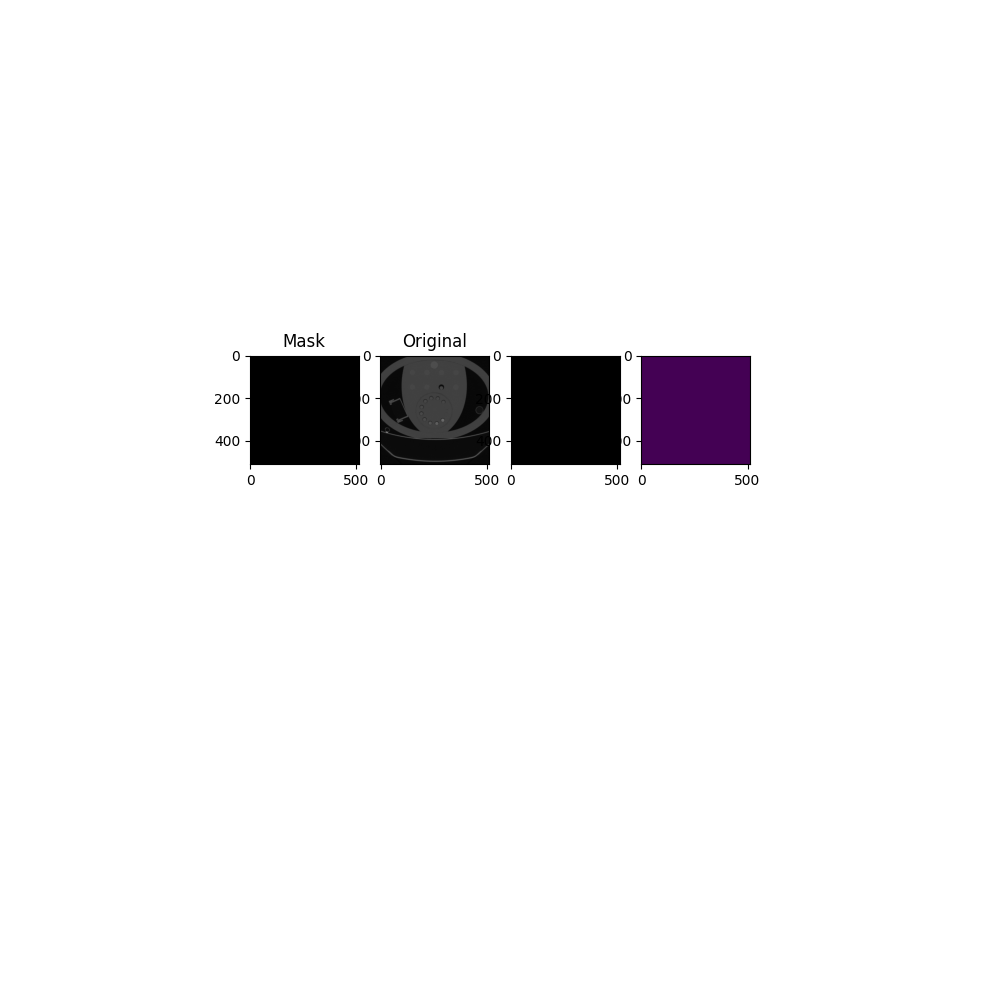

In [21]:
from SPCCT_4D import vesselDiameter
%matplotlib widget
import matplotlib.pyplot as plt
import nrrd
import numpy as np
#s5 = Sample("5")
plt.clf()
samp = sample1
n = 7
readdata, header = nrrd.read("D:/3d_masks/aguix_phantom.seg.nrrd")
readdata = np.swapaxes(readdata, 0 , 1)
# Clear the current figure (if any) to start fresh
plt.clf()
# Create a subplot for the mask
plt.subplot(1, 4, 1)
plt.imshow(readdata[:, :, n], cmap='gray')  # Assuming the slice index 250 is correct
plt.title("Mask")

# Create a subplot for the original image
plt.subplot(1, 4, 2)
plt.imshow(samp.acquisition[0].conventional[:, :, n], cmap='gray')  # Ensure the index is correctly aligned with your data
plt.title("Original")

samp.acquisition[0].conventional = readdata * samp.acquisition[0].conventional

plt.subplot(1,4,3)
plt.imshow(samp.acquisition[0].conventional[:, :, n], cmap = 'gray')

plt.subplot(1,4,4)
plt.imshow(np.max(samp.acquisition[0].conventional, axis = 2))
plt.show()
samp.acquisition[0].kedge = readdata * samp.acquisition[0].kedge
samp.acquisition[0].iodine = readdata * samp.acquisition[0].iodine


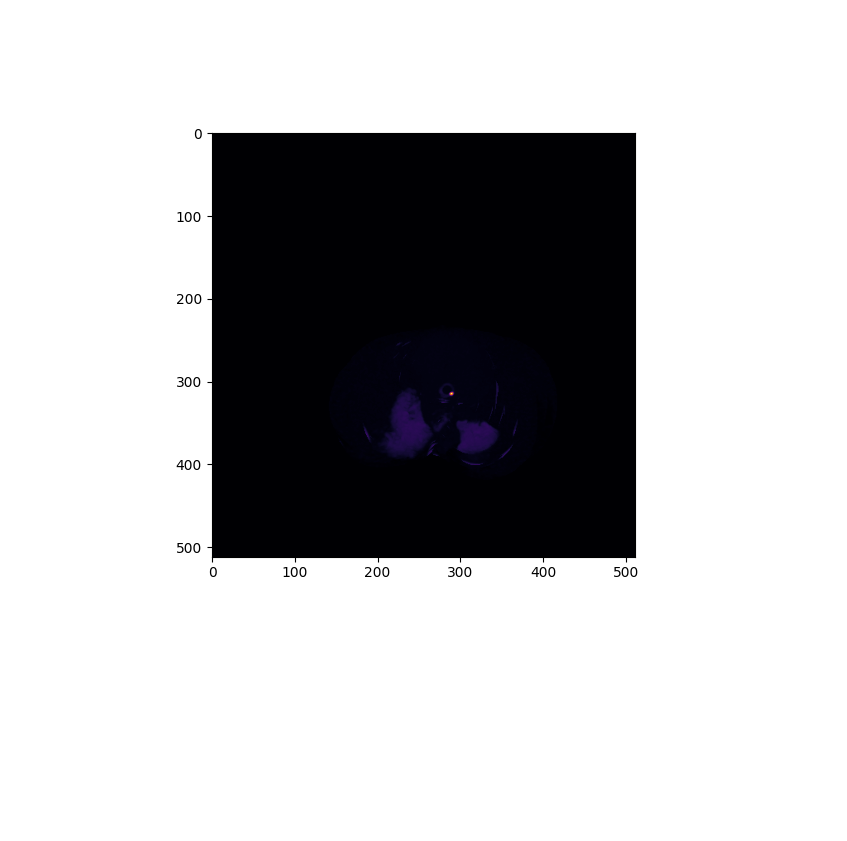

In [264]:
plt.clf()
plt.imshow(np.max(samp.acquisition[0].conventional, axis = 2), cmap = "inferno")
plt.show()

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\pyKOLOR.py:160: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.time_slider = Slider(plt.axes([0.2, 0.15, 0.65, 0.03], facecolor='lightgray'), 't', 0, len(self.sample.acquisition)-1, valinit=self.init_time_point, valstep=1)


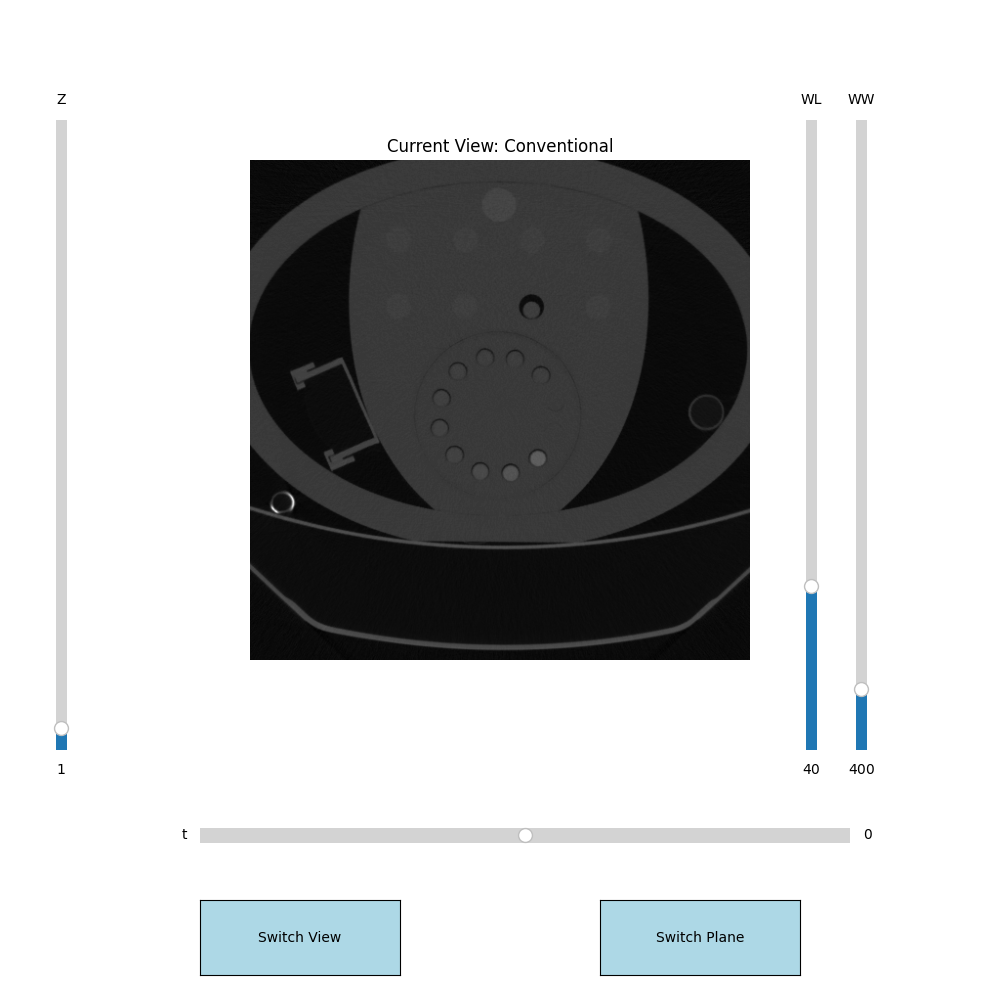

In [83]:
%matplotlib widget
from pyKOLOR import VesselAnalyzer

VesselAnalyzer(samp)

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
sample = samp.acquisition[0].conventional[:,:,:]
plt.clf()

max_projection = np.mean(sample1.acquisition[0].conventional[:,:,:], axis=2)
print(f"Max: {np.max(max_projection)}, Min:{np.min(max_projection)}")

plt.imshow(max_projection, cmap = "gray")
plt.show()

NameError: name 'samp' is not defined